In [1]:
#Import libraries

import matplotlib as mpl
mpl.use('svg')
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [2]:
mpl.rcParams.update({'font.size': 22})
mpl.rcParams['pcolor.shading']
mdpi = 300

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':["Arial"]})

# Import Data

In [4]:
# library filename and data

filename=r'~/mls-data/'

In [5]:
path = filename+'/'+'data'
os.chdir(path)

In [6]:
filenames = sorted(glob.glob('*.csv'))
data = {}

for f in filenames:
    datat = np.loadtxt(fname=f, delimiter=',')
    f2=os.path.splitext(os.path.basename(f))[0]
    data[f2] = datat

# Prep Data for Plotting

In [7]:
GD = {}
PTS = {}

keys = list(data.keys())

GDp = np.empty(len(keys), dtype=float)
PTSp = np.empty(len(keys), dtype=float)

for ii in range(len(keys)):
    GD[keys[ii]] = np.average(data[keys[ii]][:,6])
    PTS[keys[ii]] = np.average(data[keys[ii]][:,11])
    
    GDp[ii]= np.average(data[keys[ii]][:,6])
    PTSp[ii] = np.average(data[keys[ii]][:,11])

# Plot Data

In [8]:
path = filename+'/'+'plots'
os.chdir(path)

In [9]:
sns.set_style("ticks", {'axes.axisbelow': False,'grid.linestyle': u'--', 'grid.color': '.5', 'legend.frameon': True})

In [10]:
N = 4 
base_cmaps = ['Greys','Purples','Reds','Blues','Oranges','Greens']

n_base = len(base_cmaps)
colors = np.concatenate([plt.get_cmap(name)(np.linspace(0.2,0.8,N)) for name in base_cmaps])
cmap = mpl.colors.ListedColormap(colors)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(1,1,figsize=(5,1))
ax.imshow(gradient, aspect='auto', cmap=cmap);

# Plot GD vs Pts

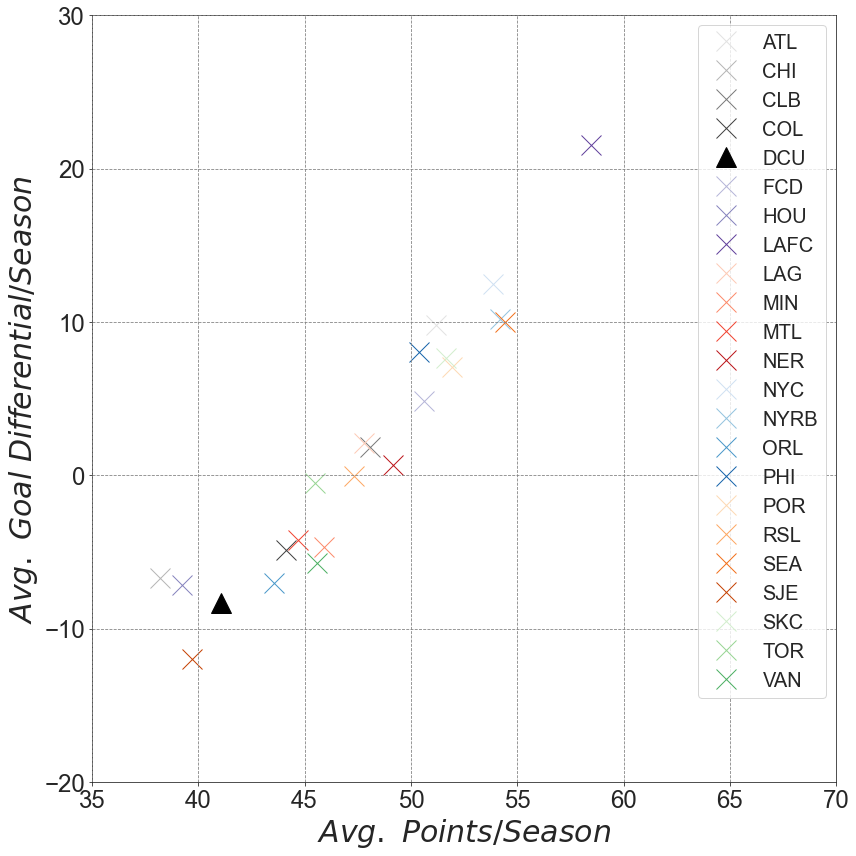

In [11]:
%matplotlib inline

x = PTSp*34
y = GDp*34

fig, ax = plt.subplots(figsize=(12, 12))
ax.grid(True)

for ii in range(len(keys)):

    if ii==4:
        
        ax.plot(x[4],y[4], linestyle='none', marker='^', markersize=20, color='k', label=keys[4])
        
    else:
        
        ax.plot(x[ii],y[ii], linestyle='none', marker='x', markersize=20, color=cmap.colors[ii], label=keys[ii])

ax.set_xticks([35,40,45,50,55,60, 65, 70])
ax.set_yticks([-20,-10,0,10,20,30])
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)

ax.set_ylabel(r'$Avg. \ Goal \ Differential/Season$', fontsize=30)
ax.set_xlabel(r'$Avg. \ Points/Season $', fontsize=30)
plt.legend(loc='best', fontsize=20)


plt.tight_layout()
plt.savefig('GD-vs-PTs.svg', dpi=mdpi, format="svg");

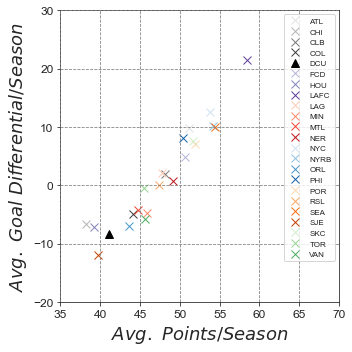

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid(True)

for ii in range(len(keys)):

    if ii==4:
        
        ax.plot(x[4],y[4], linestyle='none', marker='^', markersize=7.5, color='k', label=keys[4])
        
    else:
        
        ax.plot(x[ii],y[ii], linestyle='none', marker='x', markersize=7.5, color=cmap.colors[ii], label=keys[ii])

ax.set_xticks([35,40,45,50,55,60, 65, 70])
ax.set_yticks([-20,-10,0,10,20,30])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_ylabel(r'$Avg. \ Goal \ Differential/Season$', fontsize=18)
ax.set_xlabel(r'$Avg. \ Points/Season $', fontsize=18)
plt.legend(loc='best', fontsize=8)


plt.tight_layout()
plt.savefig('GD-vs-PTs.jpeg', dpi=mdpi);